In [1]:
# https://towardsdatascience.com/get-uncertainty-estimates-in-neural-networks-for-free-48f2edb82c8f

In [12]:
import tensorflow as tf

tf.random.set_seed(0)

X = tf.random.uniform(minval=-1, maxval=7, shape=(1000,))
y = tf.sin(X) + tf.random.normal(mean=0, stddev=0.3, shape=(1000,))

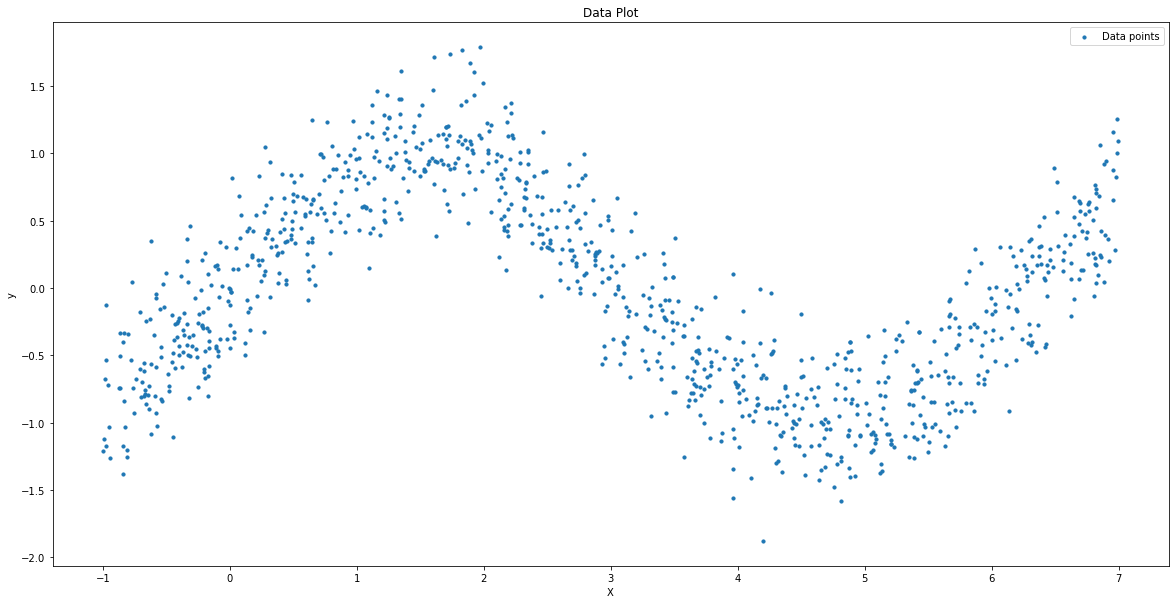

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

plt.scatter(X, y, label='Data points', s=10)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Data Plot')
plt.legend()
plt.show()

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2) # Output = (μ, ln(σ))
])

In [15]:
def loss(y_true, y_pred):
    mu = y_pred[:, :1] # first output neuron
    log_sig = y_pred[:, 1:] # second output neuron
    sig = tf.exp(log_sig) # undo the log
    
    return tf.reduce_mean(2*log_sig + ((y_true-mu)/sig)**2)

In [16]:
model.compile(loss=loss)

model.fit(
    tf.reshape(X, shape=(1000, 1)),
    tf.reshape(y, shape=(1000, 1)),
    batch_size=32,
    epochs=100
)

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 0.3924
Epoch 2/100
32/32 [==============================] - 0s 7ms/step - loss: 0.1927
Epoch 3/100
32/32 [==============================] - 0s 7ms/step - loss: 0.0717
Epoch 4/100
32/32 [==============================] - 0s 8ms/step - loss: -0.0304
Epoch 5/100
32/32 [==============================] - 0s 7ms/step - loss: -0.1565
Epoch 6/100
32/32 [==============================] - 0s 7ms/step - loss: -0.2572
Epoch 7/100
32/32 [==============================] - 0s 7ms/step - loss: -0.3508
Epoch 8/100
32/32 [==============================] - 0s 7ms/step - loss: -0.4266
Epoch 9/100
32/32 [==============================] - 0s 11ms/step - loss: -0.4947
Epoch 10/100
32/32 [==============================] - 0s 6ms/step - loss: -0.5433
Epoch 11/100
32/32 [==============================] - 0s 6ms/step - loss: -0.5835
Epoch 12/100
32/32 [==============================] - 0s 6ms/step - loss: -0.6050
Epoch 13/100
32/32 [=======

In [24]:
output = model(tf.reshape(X, shape=(1000, 1)))
print(tf.exp(output[:20, 1]).numpy())

[0.29877588 0.28405732 0.3332365  0.33635607 0.3183632  0.31773683
 0.3280464  0.34911177 0.3305328  0.31338528 0.32719532 0.33561084
 0.33769143 0.31616345 0.31857213 0.3366838  0.33338165 0.33563626
 0.31991327 0.30686653]


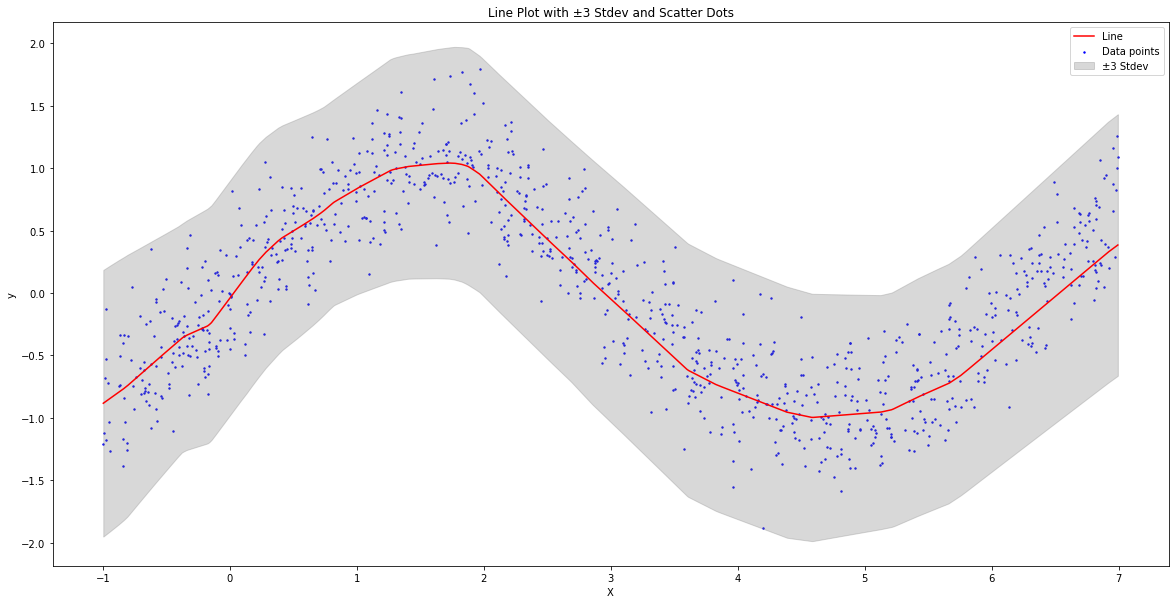

In [47]:
import matplotlib.pyplot as plt
import numpy as np

predictions = model(tf.reshape(X, shape=(1000, 1)))

mean = predictions[:, 0]
log_std = predictions[:, 1]
std = tf.exp(log_std)

X_np = np.array(X)
mean_np = np.array(mean)
std_np = np.array(std)

sorted_indices = np.argsort(X_np)
sorted_X = X_np[sorted_indices]
sorted_mean = mean_np[sorted_indices]
sorted_std = std_np[sorted_indices]

plt.figure(figsize=(20, 10))
dot_size = 2

plt.scatter(X_np, y, label='Data points', color='blue', s=dot_size)
plt.plot(sorted_X, sorted_mean, color='red', label='Line')
plt.fill_between(sorted_X, sorted_mean - 3 * sorted_std, sorted_mean + 3 * sorted_std, color='gray', alpha=0.3, label='±3 Stdev')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Line Plot with ±3 Stdev and Scatter Dots')
plt.legend()
plt.show()